In [1]:
from data_gen import *
from experiment import *
from ad_learning import *
from ad_neural import *

## Continuous outcome

In [5]:

# poly = Gate layer에서 poly term 추가할 건지
# smooth = 시나리오2,3 => 시나리오 4,5
# k_active = 남길 신호변수 개
if __name__ == "__main__":
    results = run_experiments(K=4, p=10, n=2000, n_test=10000, n_repeats=20,
                               epochs=60, warmup_epochs=40, lr=1e-3, smooth=False, hidden=[128,128], 
                               k_active=10, poly=False)
    for scen, res in results.items():
        print("\n" + "="*10, f"Scenario {scen}", "="*10)
        for model_name, stats in res.items():
            print(f"{model_name:7s} | "
                  f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                  f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")

[Scenario 1] Repeat 1/20
[ep 10] warmup, loss=7.1788
[ep 20] warmup, loss=6.8130
[ep 30] warmup, loss=6.4870
[ep 40] warmup, loss=6.3473
==> warm-up done, gate ON, k_active=10, init topk=[3 7 1 8 2 4 9 0 5 6]
[ep 50] loss=6.2422, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=6.1318, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 2/20
[ep 10] warmup, loss=7.0829
[ep 20] warmup, loss=6.7145
[ep 30] warmup, loss=6.3676
[ep 40] warmup, loss=6.2149
==> warm-up done, gate ON, k_active=10, init topk=[3 4 6 2 7 0 1 9 5 8]
[ep 50] loss=6.1148, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=6.0111, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 3/20
[ep 10] warmup, loss=7.0437
[ep 20] warmup, loss=6.6833
[ep 30] warmup, loss=6.4029
[ep 40] warmup, loss=6.2929
==> warm-up done, gate ON, k_active=10, init topk=[3 1 2 6 8 0 9 7 4 5]
[ep 50] loss=6.1957, active_idx=[0 1 2 3 4 5 6 7 8 9]
[ep 60] loss=6.0911, active_idx=[0 1 2 3 4 5 6 7 8 9]
[Scenario 1] Repeat 4/20
[ep 10] warmup, loss=7.1

## Survival outcome

In [ ]:
if __name__ == "__main__":
    res_surv = run_experiments_survival(
        K=4, p=40, n=2000, n_test=10000,
        n_repeats=20, epochs=60, lr=1e-3, warmup_epochs=40,
        lam=0.05, step=1e-2,
        smooth=False, theta_cens=50.0, k_active=10, poly=True
    )

    for scen, res in res_surv.items():
        print("\n" + "="*10, f"Scenario {scen}", "="*10)
        for model_name, stats in res.items():
            print(f"{model_name:7s} | "
                  f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                  f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")


[Scenario 1] Repeat 1/20
[Surv-NN] warmup ep 10/60 loss=20.3419
[Surv-NN] warmup ep 20/60 loss=20.0380
[Surv-NN] warmup ep 30/60 loss=19.6157
[Surv-NN] warmup ep 40/60 loss=19.1808
==> Warm-up done. Gate ON with k=10. initial topk=[ 2  0  1  3 11  5 27 38 14 39]
[Surv-NN] ep 50/60 loss=19.3845, active_idx=[ 0  1  2  3  5 11 14 27 38 39]
[Surv-NN] ep 60/60 loss=19.3099, active_idx=[ 0  1  2  3  5 11 14 27 38 39]
[Scenario 1] Repeat 2/20
[Surv-NN] warmup ep 10/60 loss=20.7604
[Surv-NN] warmup ep 20/60 loss=20.4710
[Surv-NN] warmup ep 30/60 loss=20.0772
[Surv-NN] warmup ep 40/60 loss=19.6737
==> Warm-up done. Gate ON with k=10. initial topk=[ 2  3  1  0 33 21 36 16 11  7]
[Surv-NN] ep 50/60 loss=19.8465, active_idx=[ 0  1  2  3  7 11 16 21 33 36]
[Surv-NN] ep 60/60 loss=19.7576, active_idx=[ 0  1  2  3  7 11 16 21 33 36]
[Scenario 1] Repeat 3/20
[Surv-NN] warmup ep 10/60 loss=20.4503
[Surv-NN] warmup ep 20/60 loss=20.2500
[Surv-NN] warmup ep 30/60 loss=19.9292
[Surv-NN] warmup ep 40/60 lo

In [12]:
if __name__ == "__main__":

    p_list = [800]
    n_list = [800, 2000]
    smooth_list = [False, True]

    total_cases = len(p_list) * len(n_list) * len(smooth_list)
    case_id = 1

    for p in p_list:
        for n in n_list:
            for smooth in smooth_list:

                res_surv = run_experiments_survival(
                    K=4,
                    p=p,
                    n=n,
                    n_test=10000,
                    n_repeats=20,
                    epochs=60,
                    lr=1e-3,
                    warmup_epochs=40,
                    lam=0.05,
                    step=1e-2,
                    smooth=smooth,
                    theta_cens=50.0,
                    k_active=10,
                    poly=False
                )

                # --- 결과 출력 ---
                print("\n" + "#" * 60)
                print(f"Case {case_id}/{total_cases}")
                print(f"p={p}, n={n}, smooth={smooth}")
                print("#" * 60)
                for scen, res in res_surv.items():
                    print("\n" + "="*12, f"Scenario {scen}", "="*12)
                    for model_name, stats in res.items():
                        print(f"{model_name:7s} | "
                              f"Error mean={stats['Error_mean']:.3f}, var={stats['Error_var']:.4f} | "
                              f"Value mean={stats['Value_mean']:.3f}, var={stats['Value_var']:.4f}")

                case_id += 1

    print("\nAll experiments finished.")


[Scenario 1] Repeat 1/20
[Surv-NN] warmup ep 10/60 loss=16.7374
[Surv-NN] warmup ep 20/60 loss=14.9690
[Surv-NN] warmup ep 30/60 loss=12.6929
[Surv-NN] warmup ep 40/60 loss=10.5483
==> Warm-up done. Gate ON with k=20. initial topk=[  2   3 608 414 305 332 482 411 627 781 758 152 539 346 561 600   0 476
 308 235]
[Surv-NN] ep 50/60 loss=16.6882, active_idx=[  0   2   3 152 235 305 308 332 346 411 414 476 482 539 561 600 608 627
 758 781]
[Surv-NN] ep 60/60 loss=16.3782, active_idx=[  0   2   3 152 235 305 308 332 346 411 414 476 482 539 561 600 608 627
 758 781]
[Scenario 1] Repeat 2/20
[Surv-NN] warmup ep 10/60 loss=16.9785
[Surv-NN] warmup ep 20/60 loss=15.2703
[Surv-NN] warmup ep 30/60 loss=13.0365
[Surv-NN] warmup ep 40/60 loss=10.8503
==> Warm-up done. Gate ON with k=20. initial topk=[  3   2  91 296 215 389 127 172 581 124 163 178  32 720 437  37 160 606
 290   0]
[Surv-NN] ep 50/60 loss=16.8579, active_idx=[  0   2   3  32  37  91 124 127 160 163 172 178 215 290 296 389 437 581
 

KeyboardInterrupt: 

## k_active search

In [2]:
def cv_k_active(
    k_grid,
    K=4,
    p=40,
    n=800,
    n_test=10000,
    n_repeats=20,
    epochs=60,
    warmup_epochs=40,
    lr=1e-3,
    smooth=False,
    hidden=[128, 128],
    poly=True,
    target_model_name="ad_nn_with_warmup_poly",  # <- 여기를 네 결과 dict key에 맞게 수정
):
    """
    여러 k_active 후보에 대해 run_experiments를 돌리고,
    각 시나리오별로 Value_mean이 가장 큰 k_active를 찾는다.
    """
    # scen -> {k_active -> score}
    cv_scores = {}

    for k in k_grid:
        print("\n" + "#" * 70)
        print(f"[CV] Running experiments with k_active={k}")
        print("#" * 70)

        results = run_experiments(
            K=K,
            p=p,
            n=n,
            n_test=n_test,
            n_repeats=n_repeats,
            epochs=epochs,
            warmup_epochs=warmup_epochs,
            lr=lr,
            smooth=smooth,
            hidden=hidden,
            k_active=k,
            poly=poly,
        )

        # 각 시나리오별로 target_model_name의 Value_mean 기록
        for scen, res in results.items():
            if scen not in cv_scores:
                cv_scores[scen] = {}

            # target_model_name이 없으면 첫 번째 모델을 대신 사용 (안전장치)
            if target_model_name in res:
                stats = res[target_model_name]
            else:
                first_name = list(res.keys())[0]
                print(
                    f"[WARN] target_model_name='{target_model_name}' not found in Scenario {scen}. "
                    f"Using '{first_name}' instead."
                )
                stats = res[first_name]

            score = stats["Value_mean"]
            cv_scores[scen][k] = score
            print(
                f"  Scenario {scen} | k_active={k:2d} | "
                f"Value_mean={score:.3f}"
            )

    # 시나리오별 best k_active 출력
    print("\n" + "=" * 70)
    print("Best k_active per scenario (by Value_mean)")
    print("=" * 70)
    best_k = {}
    for scen, score_dict in cv_scores.items():
        k_star = max(score_dict, key=score_dict.get)
        best_k[scen] = k_star
        print(
            f"Scenario {scen}: "
            f"best k_active={k_star} "
            f"(Value_mean={score_dict[k_star]:.3f})"
        )

    return cv_scores, best_k


In [4]:
if __name__ == "__main__":
    k_grid = [6, 8, 10, 12, 16]

    cv_scores, best_k = cv_k_active(
        k_grid,
        K=4,
        p=40,
        n=800,
        n_test=10000,
        n_repeats=20,
        epochs=60,
        warmup_epochs=40,
        lr=1e-3,
        smooth=False,
        hidden=[128,128],
        poly=True,
        target_model_name="ad_nn_with_warmup_poly",  # <- 너 결과 dict에서 실제 이름으로 수정
    )



######################################################################
[CV] Running experiments with k_active=6
######################################################################
[Scenario 1] Repeat 1/20
[ep 10] warmup, loss=6.9486
[ep 20] warmup, loss=6.3465
[ep 30] warmup, loss=5.2394
[ep 40] warmup, loss=4.1669
==> warm-up done, gate ON, k_active=6, init topk=[ 3  2  1 21 26 23]
[ep 50] loss=5.6660, active_idx=[ 1  2  3 21 23 26]
[ep 60] loss=5.5101, active_idx=[ 1  2  3 21 23 26]
[Scenario 1] Repeat 2/20
[ep 10] warmup, loss=6.5589
[ep 20] warmup, loss=6.0447
[ep 30] warmup, loss=5.1013
[ep 40] warmup, loss=4.0640
==> warm-up done, gate ON, k_active=6, init topk=[ 3  0  5 38 30 32]
[ep 50] loss=5.8322, active_idx=[ 0  3  5 30 32 38]
[ep 60] loss=5.6625, active_idx=[ 0  3  5 30 32 38]
[Scenario 1] Repeat 3/20
[ep 10] warmup, loss=6.7640
[ep 20] warmup, loss=6.2672
[ep 30] warmup, loss=5.3478
[ep 40] warmup, loss=4.2616
==> warm-up done, gate ON, k_active=6, init topk=[ 1  2  3 

## data eda


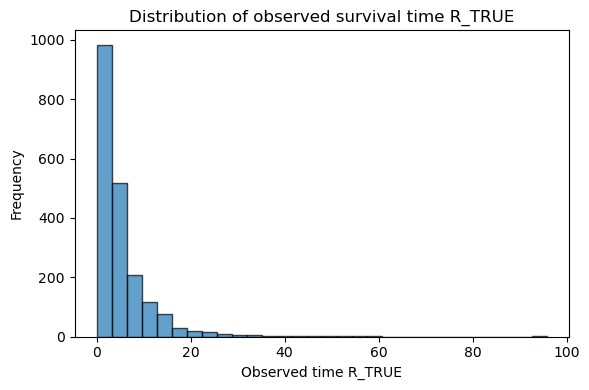

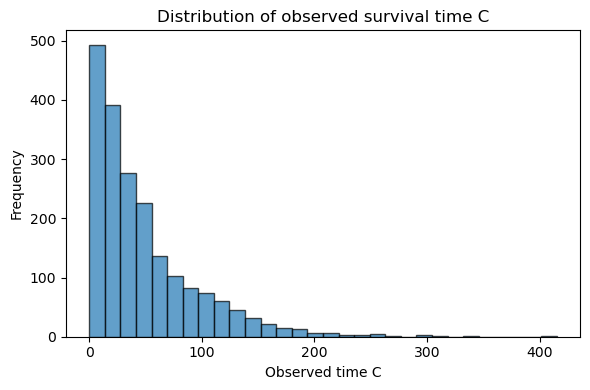

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 예시: 시뮬레이션 한 번 돌리기
K = 4
X, A, T, Delta, true_opt, R_true, C = simulate_data_surv(
    K=K, n=2000, p=10, scenario=3, seed=0, smooth=False
)

def print_survival_summary(R_true, C, T, Delta):
    def summary_stats(name, arr):
        print(f"\n--- {name} ---")
        print(f"n = {len(arr)}")
        print(f"mean       = {np.mean(arr):.4f}")
        print(f"median     = {np.median(arr):.4f}")
        print(f"25% quant  = {np.quantile(arr, 0.25):.4f}")
        print(f"50% quant  = {np.quantile(arr, 0.50):.4f}")
        print(f"75% quant  = {np.quantile(arr, 0.75):.4f}")
        print(f"min        = {np.min(arr):.4f}")
        print(f"max        = {np.max(arr):.4f}")

    print("========== Survival Data Summary ==========")

    summary_stats("True event time (R_true)", R_true)
    summary_stats("Censoring time (C)", C)
    summary_stats("Observed time (T = min(R_true, C))", T)

    # Delta: event indicator
    print("\n--- Delta (event observed) ---")
    print(f"event rate    = {np.mean(Delta):.4f}")
    print(f"censoring rate= {1-np.mean(Delta):.4f}")


plt.figure(figsize=(6,4))
plt.hist(R_true, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Observed time R_TRUE")
plt.ylabel("Frequency")
plt.title("Distribution of observed survival time R_TRUE")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(C, bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Observed time C")
plt.ylabel("Frequency")
plt.title("Distribution of observed survival time C")
plt.tight_layout()
plt.show()

In [ ]:
print_survival_summary(R_true, C, T, Delta)


========== Survival Data Summary ==========

--- True event time (R_true) ---
n = 2000
mean       = 5.4864
median     = 3.3902
25% quant  = 1.7290
50% quant  = 3.3902
75% quant  = 6.4983
min        = 0.1174
max        = 95.7618

--- Censoring time (C) ---
n = 2000
mean       = 48.2208
median     = 32.8106
25% quant  = 14.2223
50% quant  = 32.8106
75% quant  = 66.1711
min        = 0.0323
max        = 415.1387

--- Observed time (T = min(R_true, C)) ---
n = 2000
mean       = 4.7941
median     = 3.0951
25% quant  = 1.6141
50% quant  = 3.0951
75% quant  = 5.8836
min        = 0.0323
max        = 55.0395

--- Delta (event observed) ---
event rate    = 0.8930
censoring rate= 0.1070
